# Analysis of Boston Marathon Finishers

The Boston Marathon is the oldest marathon run in the US and it is the only marathon (other than olympic trails) that most of the participants have to qualify to participate. 

This dataset has three files of 3 years' data respectively. Each file contains the name, age, gender, country, city and state (where available), times at 9 different stages of the race, expected time(only 2016 has), finish time and pace, overall place, gender place and division place.

I want to find out a good race strategy to help runners performance better in future races.

OK! Let's start!


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import time
import math
import random
from scipy import stats
import thinkplot
import thinkstats2

%matplotlib inline
sns.set()

## 1. Prepare data

### 1.1 Overview Data
Firstly, let's read in our data from the data files. Have a look of our raw data to see how should we clean the data.

In [2]:
# read in data from csv files
df_2017 = pd.read_csv('dataset/marathon_results_2017.csv')
df_2016 = pd.read_csv('dataset/marathon_results_2016.csv')
df_2015 = pd.read_csv('dataset/marathon_results_2015.csv')

In [3]:
df_2017.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


In [4]:
df_2016.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


In [5]:
df_2015.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


### 1.2 Clean data  

#### 1.2.1 Delete useless columns  
1. Delete empty columns.
2. Delete "Proj Time". Only 2016 has data of this attribute. The values of it have nothing different with "Official Time".
3. Delete "State" and "Citizen". Because most of their values are missing.

In [6]:
# get rid of the useless columns
df_2017.drop(df_2017.columns[[0,9]], axis=1, inplace=True)
df_2017.drop('Proj Time', axis=1, inplace=True)
df_2017.drop('State', axis=1, inplace=True)
df_2017.drop('Citizen', axis=1, inplace=True)

In [7]:
df_2016.drop(df_2016.columns[8], axis=1, inplace=True)
df_2016.drop('Proj Time', axis=1, inplace=True)
df_2016.drop('State', axis=1, inplace=True)
df_2016.drop('Citizen', axis=1, inplace=True)

In [8]:
df_2015.drop(df_2015.columns[[0,9]], axis=1, inplace=True)
df_2015.drop('Proj Time', axis=1, inplace=True)
df_2015.drop('State', axis=1, inplace=True)
df_2015.drop('Citizen', axis=1, inplace=True)

#### 1.2.2 Convert the type of the time

Clean work is not finish yet.  
When I try to convert the type of time, I get some errors. The reason is there are some records' values are invalid.  
I use binary search to go through the dataset to find them. Here it is!  
Considering the size of our data, I just get rid of this record. Remeber to reset index after delete!

In [9]:
#delete this record because of a typo in 'Official Time'
df_2015.loc[2378]

Bib                        3820
Name              Wright, Brian
Age                          27
M/F                           M
City             Virginia Beach
Country                     USA
5K                      0:22:47
10K                     0:43:17
15K                     1:04:51
20K                     1:25:30
Half                    1:30:05
25K                     1:46:28
30K                     2:08:27
35K                     2:30:35
40K                     2:51:49
Pace                    0:06:51
Official Time           2:58:81
Overall                    2379
Gender                     2246
Division                   1689
Name: 2378, dtype: object

In [10]:
df_2015.drop(2378, inplace=True)

In [11]:
# Reset the integer based index of the DataFrame
df_2015.reset_index(drop=True, inplace=True)

Convert the type of the time to make caculation possibal. 

In [12]:
# convert all time columns into time type
df_2017.iloc[:,6:17] = df_2017.iloc[:, 6:17].apply(pd.to_timedelta)
df_2016.iloc[:,6:17] = df_2016.iloc[:, 6:17].apply(pd.to_timedelta)
df_2015.iloc[:,6:17] = df_2015.iloc[:, 6:17].apply(pd.to_timedelta)

#### 1.2.3 Delete  overtime records
Now I want to make sure the 'Official Time' of all records are within the close-gate time，6 hours.  
Check the time and delete those overtime records.  
ps: Remeber to reset index after delete!

In [13]:
# To see if there is any overtime record in raw data of 2017
overtime_2017 = df_2017[df_2017['Official Time'] > '06:00:00']
frac_of_dataset_2017 = 100 * len(overtime_2017) / len(df_2017)
print('{0:.1f}% of records in raw data of 2017 are overtime'.format(frac_of_dataset_2017))

0.5% of records in raw data of 2017 are overtime


In [14]:
# To see if there is any overtime record in raw data of 2016
overtime_2016 = df_2016[df_2016['Official Time'] > '06:00:00']
frac_of_dataset_2016 = 100 * len(overtime_2016) / len(df_2016)
print('{0:.1f}% of records in raw data of 2016 are overtime'.format(frac_of_dataset_2016))

0.4% of records in raw data of 2016 are overtime


In [15]:
# To see if there is any overtime record in raw data of 2015
overtime_2015 = df_2015[df_2015['Official Time'] > '06:00:00']
frac_of_dataset_2015 = 100 * len(overtime_2015) / len(df_2015)
print('{0:.1f}% of records in raw data of 2015 are overtime'.format(frac_of_dataset_2015))

0.3% of records in raw data of 2015 are overtime


In [16]:
# Remove any overtime records of df_2017
df_2017 = df_2017[df_2017['Official Time'] <= '06:00:00']

# Reset the integer based index of the DataFrame
df_2017.reset_index(drop=True, inplace=True)

In [17]:
# Remove any overtime record of df_2016
df_2016 = df_2016[df_2016['Official Time'] <= '06:00:00']

# Reset the integer based index of the DataFrame
df_2016.reset_index(drop=True, inplace=True)

In [18]:
# Remove any overtime record of df_2015
df_2015 = df_2015[df_2015['Official Time'] <= '06:00:00']

# Reset the integer based index of the DataFrame
df_2015.reset_index(drop=True, inplace=True)

#### 1.2.4 Add a new column of finish time in seconds  

In [19]:
df_2017['finish_time_second'] = df_2017['Official Time'].apply(lambda t: t.seconds)
df_2016['finish_time_second'] = df_2016['Official Time'].apply(lambda t: t.seconds)
df_2015['finish_time_second'] = df_2015['Official Time'].apply(lambda t: t.seconds)

#### 1.2.5 Add an additional column to identify years

In [20]:
df_2017['year'] = 2017
df_2016['year'] = 2016
df_2015['year'] = 2015

## 2. exploration

The colors of Bostom Marathon are yellow and blue. So~

['#ffff00', '#ffff32', '#ffff66', '#ffff98', '#ffffcc', '#fefeff', '#d9e1f1', '#b2c2e2', '#8da4d4', '#6686c5', '#4168b7']


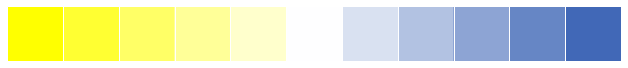

In [21]:
hex_colors = sns.blend_palette(['yellow','white','#4168B7'], 11).as_hex()
print(hex_colors)
sns.palplot(hex_colors)

### 2.1 How many finishers?

### 2.1.1 By Gender

In [22]:
# Count the number of finishers of 2017 by gender
gender_2017 = df_2017['M/F']
gender_counts_2017 = gender_2017.value_counts()

# Return a DataFrame with the index as an additional column
gender_counts_2017 = gender_counts_2017.reset_index()

In [23]:
# Count the number of finishers of 2016 by gender
gender_2016 = df_2016['M/F']
gender_counts_2016 = gender_2016.value_counts()

# Return a DataFrame with the index as an additional column
gender_counts_2016 = gender_counts_2016.reset_index()

In [24]:
# Count the number of finishers of 2015 by gender
gender_2015 = df_2015['M/F']
gender_counts_2015 = gender_2015.value_counts()

# Return a DataFrame with the index as an additional column
gender_counts_2015 = gender_counts_2015.reset_index()

In [25]:
total_finishers_gender = pd.concat([df_2017['M/F'],df_2016['M/F'],df_2015['M/F']])
total_finishers_gender.reset_index(drop=True, inplace=True)

In [26]:
total_years = pd.concat([df_2017['year'],df_2016['year'],df_2015['year']])
total_years.reset_index(drop=True, inplace=True)

In [27]:
finishers_gender = pd.crosstab(total_years,total_finishers_gender)
finishers_gender.head()

M/F,F,M
year,,
2015,11974,14538
2016,12104,14415
2017,11897,14387


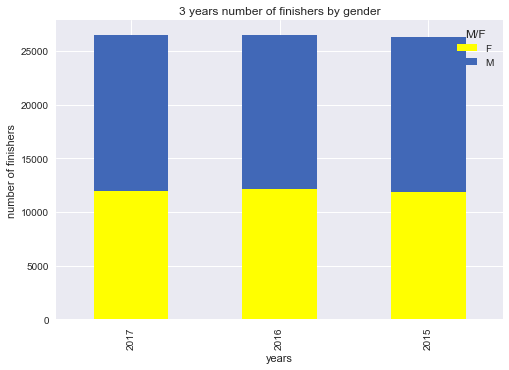

In [28]:
# Create the plot
ax = finishers_gender.plot(kind='bar', stacked=True, color=[hex_colors[0],hex_colors[10]])

# Formatting
ax.set_title('3 years number of finishers by gender')
ax.set_xlabel('years')
ax.set_ylabel('number of finishers')

# Format x tick labels
labels = ['2017','2016','2015']
ax.set_xticklabels(labels)

plt.show()

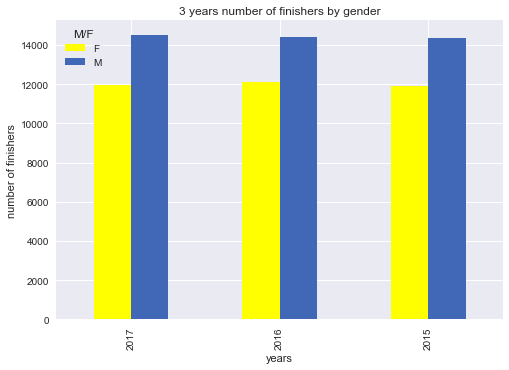

In [29]:
# Create the plot
ax = finishers_gender.plot(kind='bar', color=[hex_colors[0],hex_colors[10]])

# Formatting
ax.set_title('3 years number of finishers by gender')
ax.set_xlabel('years')
ax.set_ylabel('number of finishers')

# Format x tick labels
labels = ['2017','2016','2015']
ax.set_xticklabels(labels)

plt.show()

### 2.1.2 By Age Groups

According to official race age groups, ages are cutted into :18-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80-84

In [30]:
# Select the bin intervals
age_bins = [18,34,39,44,49,54,59,64,69,74,79,84]

# Return indices of half-open bins to which each value of column belongs.
age_groups_2017 = pd.cut(df_2017['Age'], bins=age_bins, include_lowest=True)
age_groups_2017_counts = age_groups_2017.value_counts(sort=False)

age_groups_2016 = pd.cut(df_2016['Age'], bins=age_bins, include_lowest=True)
age_groups_2016_counts = age_groups_2016.value_counts(sort=False)

age_groups_2015 = pd.cut(df_2015['Age'], bins=age_bins, include_lowest=True)
age_groups_2015_counts = age_groups_2015.value_counts(sort=False)

In [31]:
df_2017['age_group'] = age_groups_2017
df_2016['age_group'] = age_groups_2016
df_2015['age_group'] = age_groups_2015

In [32]:
# merge 3 years dataframe
df = pd.concat([df_2017, df_2016, df_2015], axis=0, ignore_index=True)

In [33]:
# age group labels 
age_labels = ['{}-{}'.format(age_bins[i], age_bins[i+1]) for i in range(len(age_bins)-1)]

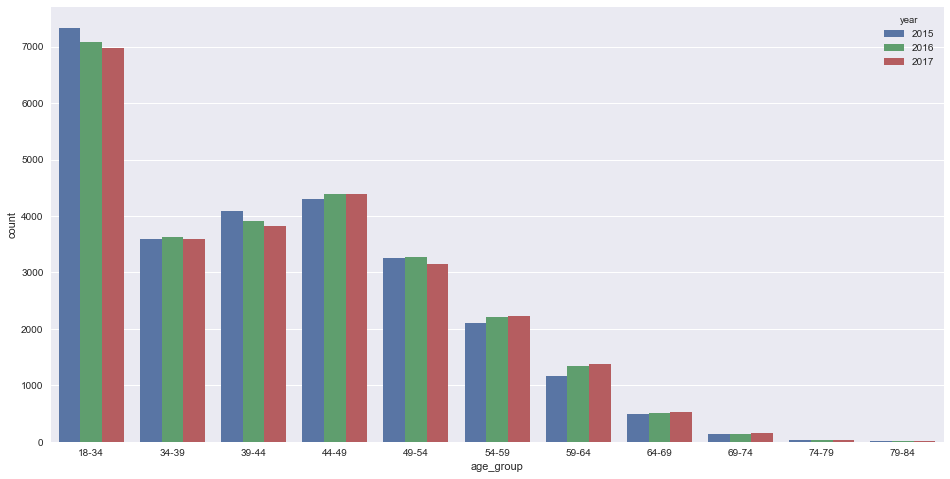

In [34]:
ax=sns.countplot(x="age_group", hue="year",data=df)
ax.figure.set_size_inches(16,8)
ax.set_xticklabels(age_labels)

That's a view of 3 years data.  
Then lets look at affenrent years respectively.

In [35]:
age_groups_gender_2017 = pd.crosstab(age_groups_2017, gender_2017)
age_groups_gender_2016 = pd.crosstab(age_groups_2016, gender_2016)
age_groups_gender_2015 = pd.crosstab(age_groups_2015, gender_2015)

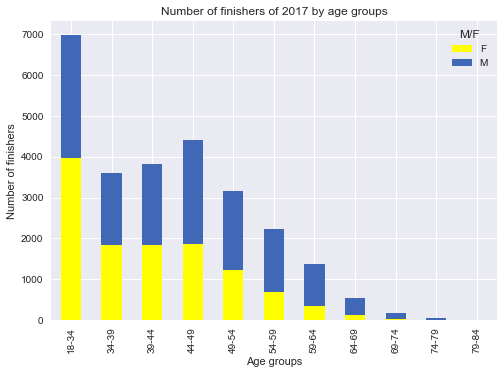

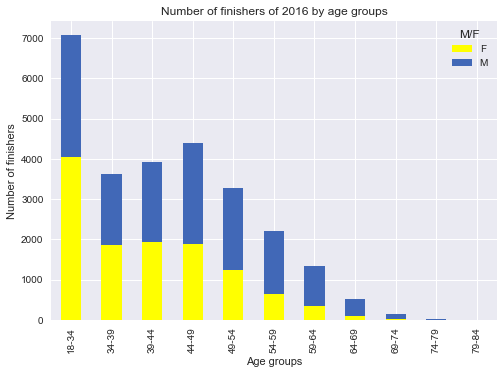

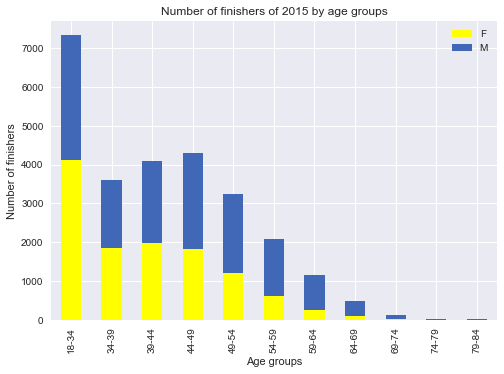

In [36]:
# Create the plot
ax_2017 = age_groups_gender_2017.plot(kind='bar', stacked=True, color=[hex_colors[0],hex_colors[10]])
ax_2016 = age_groups_gender_2016.plot(kind='bar', stacked=True, color=[hex_colors[0],hex_colors[10]])
ax_2015 = age_groups_gender_2015.plot(kind='bar', stacked=True, color=[hex_colors[0],hex_colors[10]])

# Formatting
ax_2017.set_title('Number of finishers of 2017 by age groups')
ax_2017.set_xlabel('Age groups')
ax_2017.set_ylabel('Number of finishers')

ax_2016.set_title('Number of finishers of 2016 by age groups')
ax_2016.set_xlabel('Age groups')
ax_2016.set_ylabel('Number of finishers')

ax_2015.set_title('Number of finishers of 2015 by age groups')
ax_2015.set_xlabel('Age groups')
ax_2015.set_ylabel('Number of finishers')

# Format x tick labels
ax_2017.set_xticklabels(age_labels)
ax_2016.set_xticklabels(age_labels)
ax_2015.set_xticklabels(age_labels)

plt.legend()
plt.show()

We can find: for younger age groups (before 50 years old), the femal and the male are almost equaly; but, for older age groups, the propotion of the male becomes bigger.

Let's look at this in PMFs below:

In [37]:
age_groups_gender_2017['F']=age_groups_gender_2017['F'] / age_groups_gender_2017['F'].sum()
age_groups_gender_2017['M']=age_groups_gender_2017['M'] / age_groups_gender_2017['M'].sum()

age_groups_gender_2016['F']=age_groups_gender_2016['F'] / age_groups_gender_2016['F'].sum()
age_groups_gender_2016['M']=age_groups_gender_2016['M'] / age_groups_gender_2016['M'].sum()

age_groups_gender_2015['F']=age_groups_gender_2017['F'] / age_groups_gender_2015['F'].sum()
age_groups_gender_2015['M']=age_groups_gender_2017['M'] / age_groups_gender_2015['M'].sum()

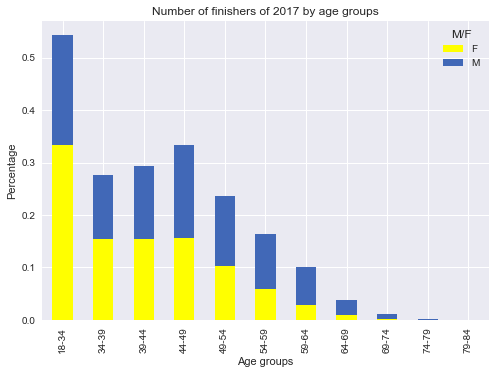

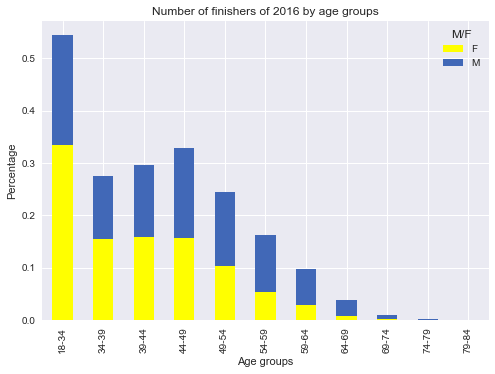

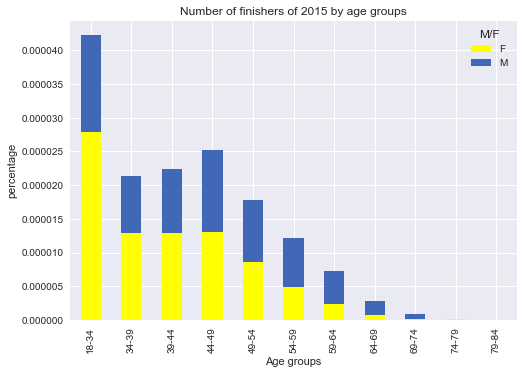

In [38]:
# Create the plot
ax_2017 = age_groups_gender_2017.plot(kind='bar', stacked=True, color=[hex_colors[0],hex_colors[10]])
ax_2016 = age_groups_gender_2016.plot(kind='bar', stacked=True, color=[hex_colors[0],hex_colors[10]])
ax_2015 = age_groups_gender_2015.plot(kind='bar', stacked=True, color=[hex_colors[0],hex_colors[10]])

# Formatting
ax_2017.set_title('Number of finishers of 2017 by age groups')
ax_2017.set_xlabel('Age groups')
ax_2017.set_ylabel('Percentage')

ax_2016.set_title('Number of finishers of 2016 by age groups')
ax_2016.set_xlabel('Age groups')
ax_2016.set_ylabel('Percentage')

ax_2015.set_title('Number of finishers of 2015 by age groups')
ax_2015.set_xlabel('Age groups')
ax_2015.set_ylabel('percentage')

# Format x tick labels
ax_2017.set_xticklabels(age_labels)
ax_2016.set_xticklabels(age_labels)
ax_2015.set_xticklabels(age_labels)

plt.show()

### 2.3 By Nationality

The USA is the biggest one. For the rest, Canada is the biggest one. The number of finishers from these two country are dramaticly more than others.

In [39]:
country_2017 = df_2017.groupby('Country').count()['Bib'].sort_values(ascending=False)
country_2016 = df_2016.groupby('Country').count()['Bib'].sort_values(ascending=False)
country_2015 = df_2015.groupby('Country').count()['Bib'].sort_values(ascending=False)

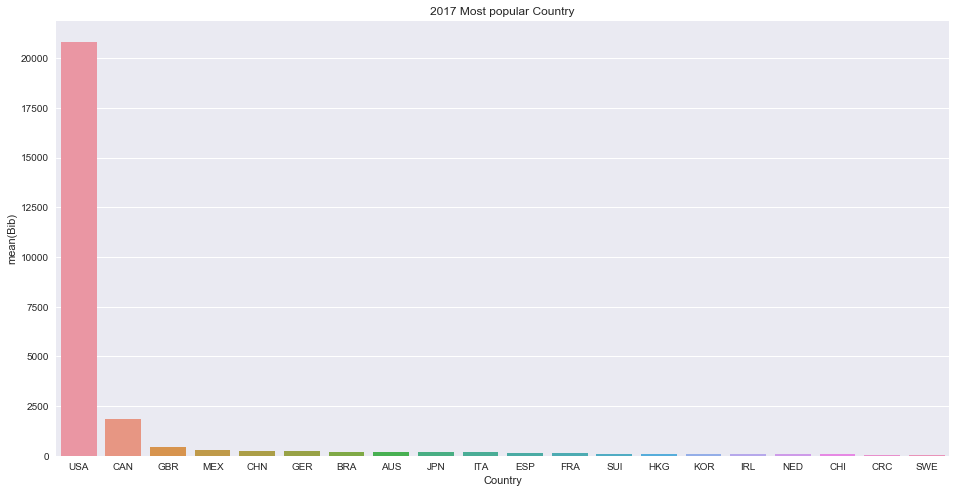

In [40]:
country_2017 = country_2017.head(20)
g = sns.barplot(country_2017.index, country_2017)
g.figure.set_size_inches(16,8)
g.set_title("2017 Most popular Country")

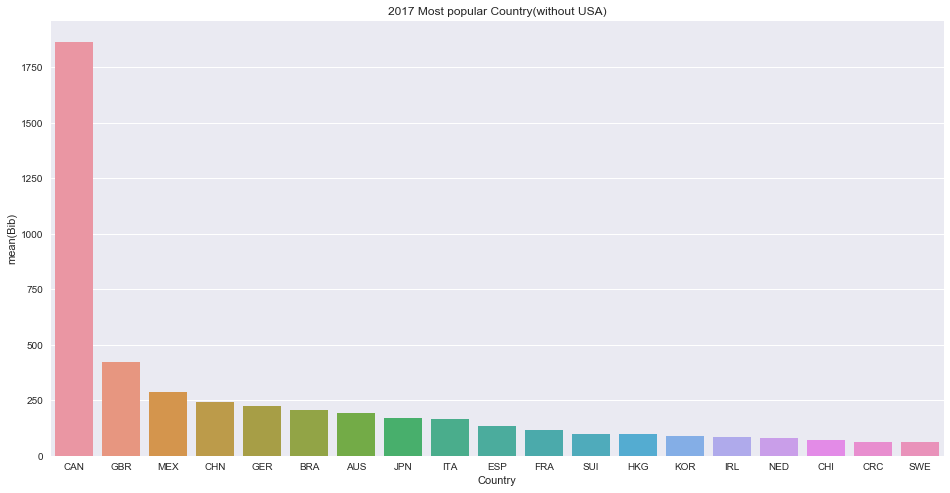

In [41]:
country_2017 = country_2017.head(20)[1:]
g = sns.barplot(country_2017.index, country_2017)
g.figure.set_size_inches(16,8)
g.set_title("2017 Most popular Country(without USA)")

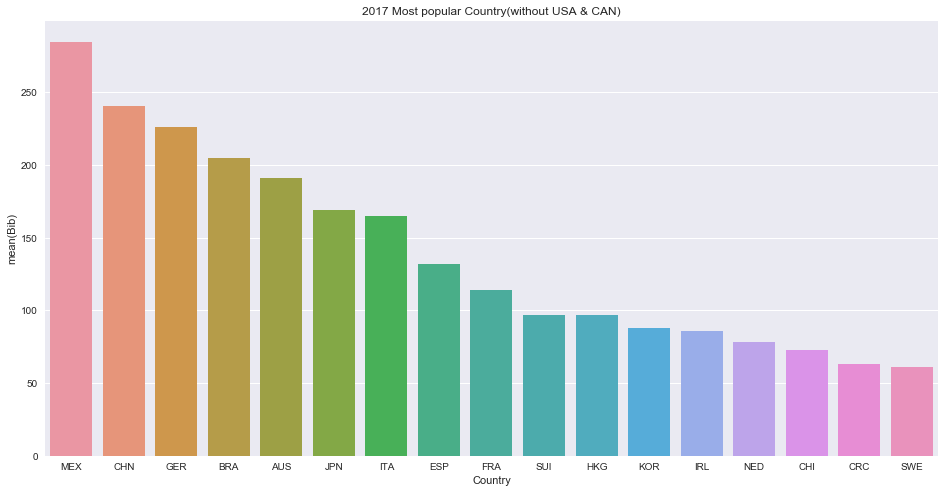

In [42]:
country_2017 = country_2017.head(20)[2:]
g = sns.barplot(country_2017.index, country_2017)
g.figure.set_size_inches(16,8)
g.set_title("2017 Most popular Country(without USA & CAN)")

## 3 Time

In [43]:
# Select the bin intervals
time_bins = np.arange(7200,22200,600)

time_labels = ['{}-{}'.format(int(time_bins[i]/60), int(time_bins[i+1]/60))for i in range(len(time_bins)-1)]

In [44]:
len(time_labels)    #debug

24

In [45]:
# Return indices of half-open bins to which each value of column belongs.
duration_intervals_2017 = pd.cut(df_2017['finish_time_second'], bins=time_bins, include_lowest=True)
time_finishers_counts_2017 = duration_intervals_2017.value_counts(sort=False)

In [46]:
duration_intervals_2016 = pd.cut(df_2016['finish_time_second'], bins=time_bins, include_lowest=True)
time_finishers_counts_2016 = duration_intervals_2016.value_counts(sort=False)

In [47]:
duration_intervals_2015 = pd.cut(df_2015['finish_time_second'], bins=time_bins, include_lowest=True)
time_finishers_counts_2015 = duration_intervals_2015.value_counts(sort=False)

In [48]:
time_finishers_counts_2017 = pd.DataFrame(time_finishers_counts_2017)
time_finishers_counts_2016 = pd.DataFrame(time_finishers_counts_2016)
time_finishers_counts_2015 = pd.DataFrame(time_finishers_counts_2015)

In [49]:
time_finishers_counts = pd.concat([time_finishers_counts_2017, time_finishers_counts_2016, time_finishers_counts_2015], axis=1)
time_finishers_counts.columns = ['2017','2016','2015']

In [50]:
time_finishers_counts

,2017,2016,2015
"(7199.999, 7800.0]",2,0,2
"(7800.0, 8400.0]",16,9,15
"(8400.0, 9000.0]",38,23,67
"(9000.0, 9600.0]",130,103,187
"(9600.0, 10200.0]",400,352,671
"(10200.0, 10800.0]",869,965,1710
"(10800.0, 11400.0]",1371,1419,2002
"(11400.0, 12000.0]",1828,2097,2351
"(12000.0, 12600.0]",2393,2783,3144
"(12600.0, 13200.0]",2712,3078,3259


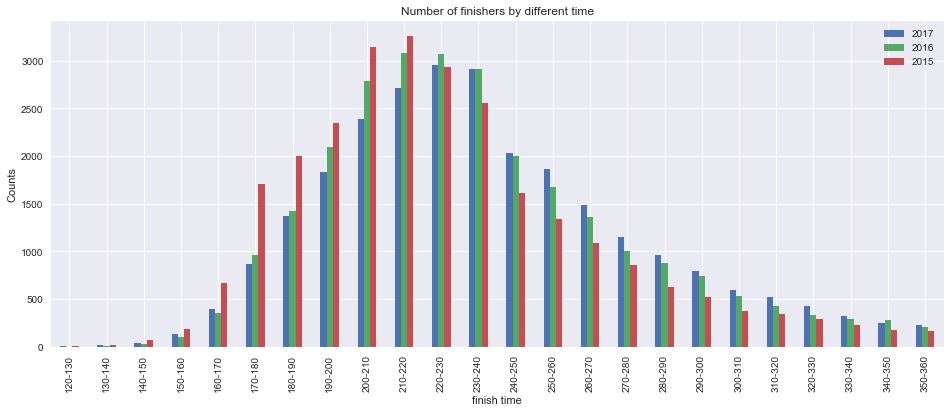

In [51]:
# Create the plot
ax = time_finishers_counts.plot.bar(rot=90,figsize=(16, 6))

# Formatting
ax.set_title('Number of finishers by different time')
ax.set_xlabel('finish time')
ax.set_ylabel('Counts')

# Format x tick labels
ax.set_xticklabels(time_labels)

plt.show()

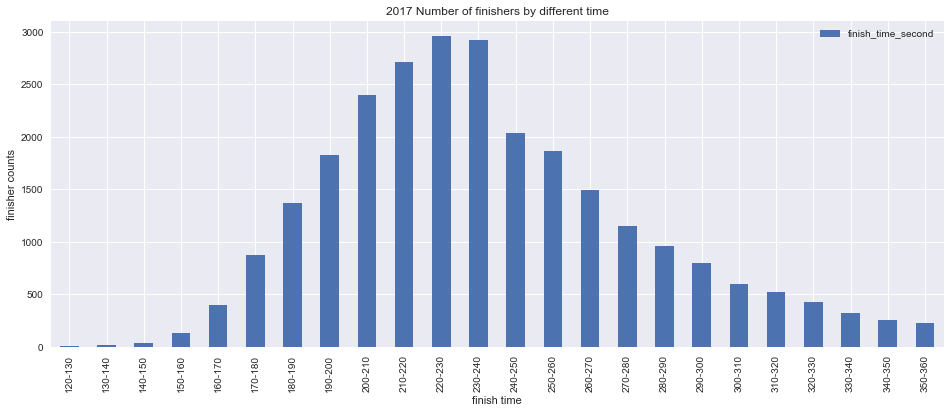

In [52]:
# Create the plot
ax = time_finishers_counts_2017.plot.bar(rot=90,figsize=(16, 6))

# Formatting
ax.set_title('2017 Number of finishers by different time')
ax.set_xlabel('finish time')
ax.set_ylabel('finisher counts')

# Format x tick labels
ax.set_xticklabels(time_labels)

plt.show()

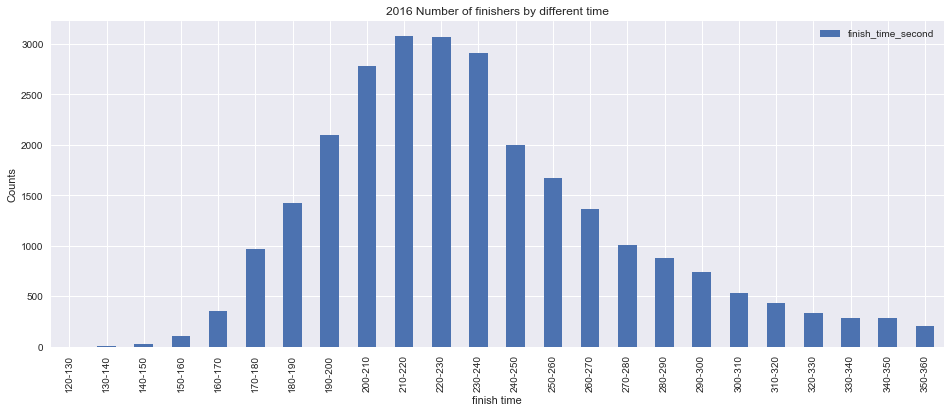

In [53]:
# Create the plot
ax = time_finishers_counts_2016.plot.bar(rot=90,figsize=(16, 6))

# Formatting
ax.set_title('2016 Number of finishers by different time')
ax.set_xlabel('finish time')
ax.set_ylabel('Counts')

# Format x tick labels
ax.set_xticklabels(time_labels)

plt.show()

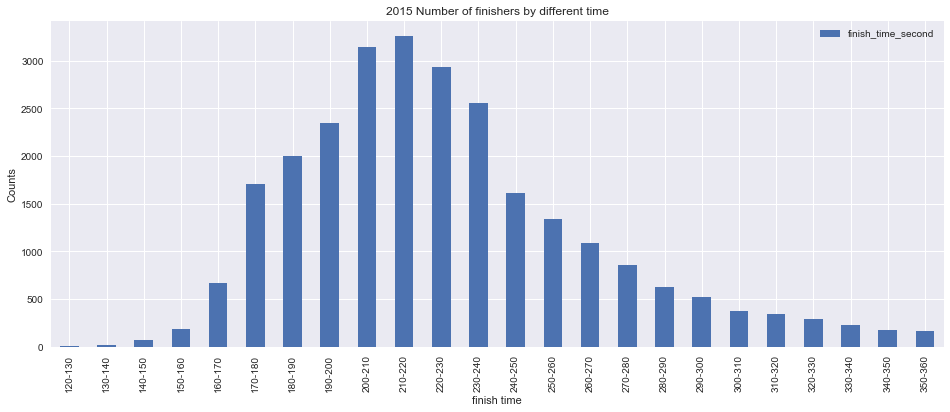

In [54]:
# Create the plot
ax = time_finishers_counts_2015.plot.bar(rot=90,figsize=(16, 6))

# Formatting
ax.set_title('2015 Number of finishers by different time')
ax.set_xlabel('finish time')
ax.set_ylabel('Counts')

# Format x tick labels
ax.set_xticklabels(time_labels)

plt.show()

In [55]:
PMF_time_finishers_counts = time_finishers_counts
PMF_time_finishers_counts['2017']= PMF_time_finishers_counts['2017']/PMF_time_finishers_counts['2017'].sum()
PMF_time_finishers_counts['2016']= PMF_time_finishers_counts['2016']/PMF_time_finishers_counts['2016'].sum()
PMF_time_finishers_counts['2015']= PMF_time_finishers_counts['2015']/PMF_time_finishers_counts['2015'].sum()

In [56]:
PMF_time_finishers_counts

,2017,2016,2015
"(7199.999, 7800.0]",0.000076,0.000000,0.000075
"(7800.0, 8400.0]",0.000609,0.000339,0.000566
"(8400.0, 9000.0]",0.001446,0.000867,0.002527
"(9000.0, 9600.0]",0.004946,0.003884,0.007053
"(9600.0, 10200.0]",0.015218,0.013274,0.025309
"(10200.0, 10800.0]",0.033062,0.036389,0.064499
"(10800.0, 11400.0]",0.052161,0.053509,0.075513
"(11400.0, 12000.0]",0.069548,0.079075,0.088677
"(12000.0, 12600.0]",0.091044,0.104944,0.118588
"(12600.0, 13200.0]",0.103181,0.116068,0.122925


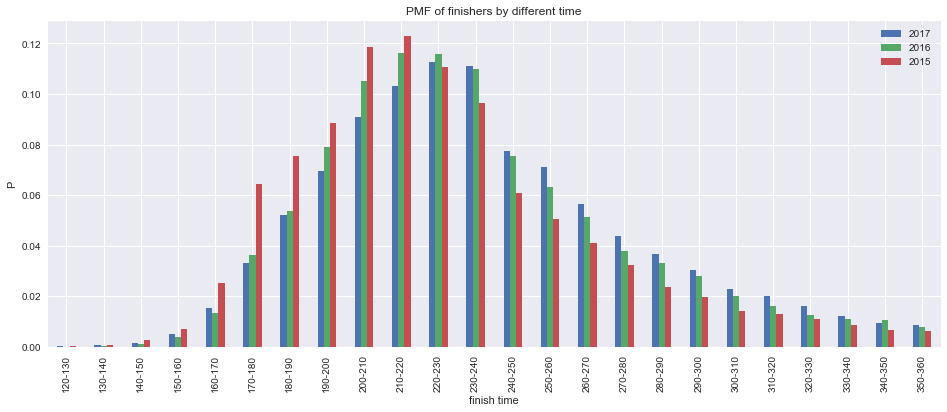

In [57]:
# Create the plot
ax = PMF_time_finishers_counts.plot.bar(rot=90,figsize=(16, 6))

# Formatting
ax.set_title('PMF of finishers by different time')
ax.set_xlabel('finish time')
ax.set_ylabel('P')

# Format x tick labels
ax.set_xticklabels(time_labels)

plt.show()

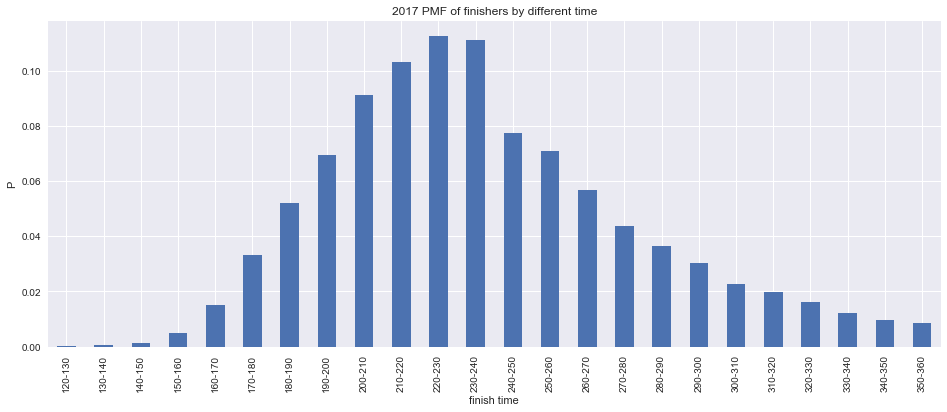

In [58]:
# Create the plot
ax = PMF_time_finishers_counts['2017'].plot.bar(rot=90,figsize=(16, 6))

# Formatting
ax.set_title('2017 PMF of finishers by different time')
ax.set_xlabel('finish time')
ax.set_ylabel('P')

# Format x tick labels
ax.set_xticklabels(time_labels)

plt.show()

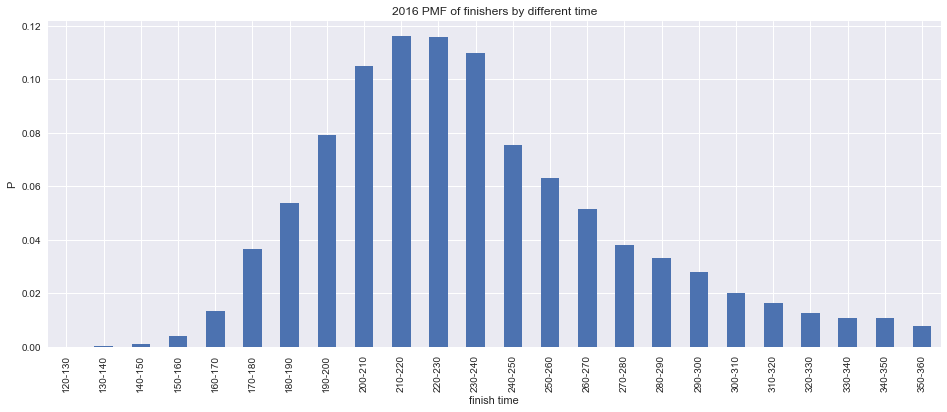

In [59]:
# Create the plot
ax = PMF_time_finishers_counts['2016'].plot.bar(rot=90,figsize=(16, 6))

# Formatting
ax.set_title('2016 PMF of finishers by different time')
ax.set_xlabel('finish time')
ax.set_ylabel('P')

# Format x tick labels
ax.set_xticklabels(time_labels)

plt.show()

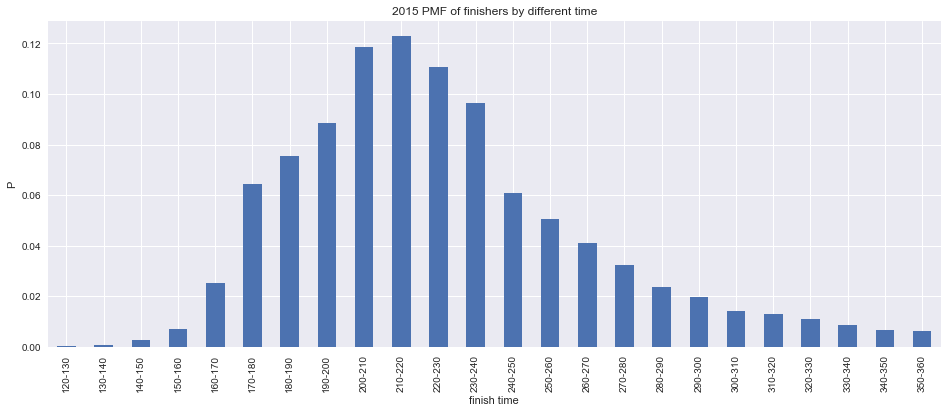

In [60]:
# Create the plot
ax = PMF_time_finishers_counts['2015'].plot.bar(rot=90,figsize=(16, 6))

# Formatting
ax.set_title('2015 PMF of finishers by different time')
ax.set_xlabel('finish time')
ax.set_ylabel('P')

# Format x tick labels
ax.set_xticklabels(time_labels)

plt.show()

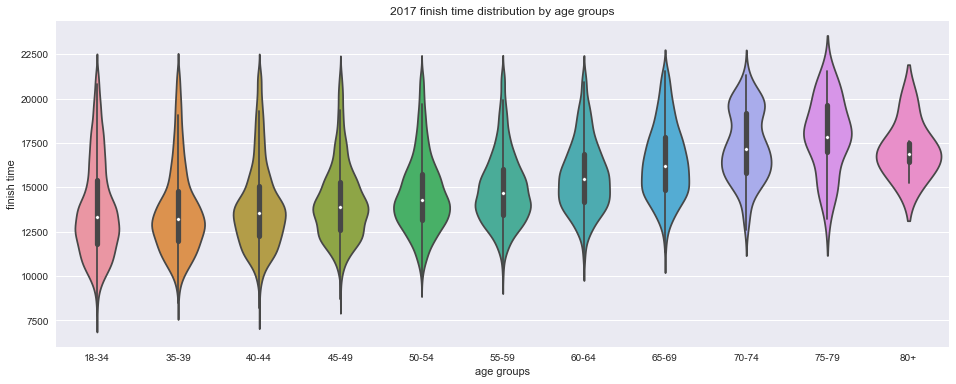

In [61]:
age_group_names = ['18-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

sns.violinplot(x="age_group", y="finish_time_second", data=df_2017, ax=ax)

ax.set_title('2017 finish time distribution by age groups')
ax.set_xlabel('age groups')
ax.set_ylabel('finish time')
ax.set_xticklabels(age_group_names)

plt.show()

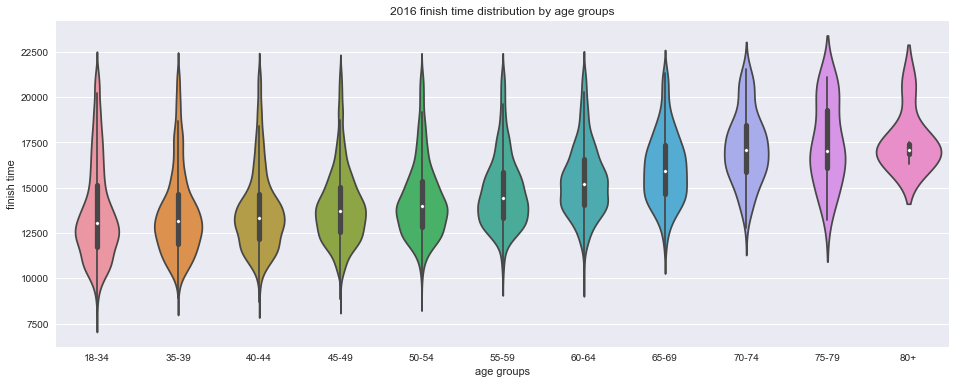

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

sns.violinplot(x="age_group", y="finish_time_second", data=df_2016, ax=ax)

ax.set_title('2016 finish time distribution by age groups')
ax.set_xlabel('age groups')
ax.set_ylabel('finish time')
ax.set_xticklabels(age_group_names)

plt.show()

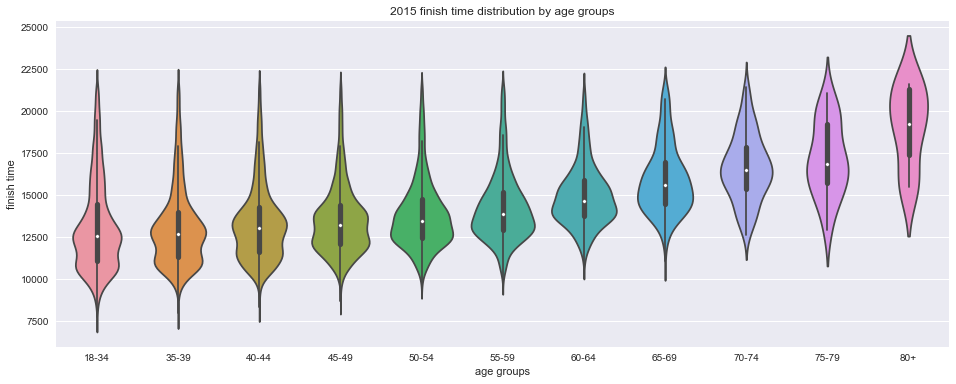

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

sns.violinplot(x="age_group", y="finish_time_second", data=df_2015, ax=ax)

ax.set_title('2015 finish time distribution by age groups')
ax.set_xlabel('age groups')
ax.set_ylabel('finish time')
ax.set_xticklabels(age_group_names)

plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79315 entries, 0 to 79314
Data columns (total 23 columns):
Bib                   79315 non-null object
Name                  79315 non-null object
Age                   79315 non-null int64
M/F                   79315 non-null object
City                  79314 non-null object
Country               79315 non-null object
5K                    79315 non-null timedelta64[ns]
10K                   79315 non-null timedelta64[ns]
15K                   79315 non-null timedelta64[ns]
20K                   79315 non-null timedelta64[ns]
Half                  79315 non-null timedelta64[ns]
25K                   79315 non-null timedelta64[ns]
30K                   79315 non-null timedelta64[ns]
35K                   79315 non-null timedelta64[ns]
40K                   79315 non-null timedelta64[ns]
Pace                  79315 non-null timedelta64[ns]
Official Time         79315 non-null timedelta64[ns]
Overall               79315 non-null int64
Ge

### CDFs

In [65]:
g = df.groupby(['age_group'])

In [66]:
sub_df_age = pd.DataFrame(g.size().reset_index(name = "Group_Count"))

In [67]:
age_group = sub_df_age['age_group']

In [68]:
age_group    #debug

0     (17.999, 34.0]
1       (34.0, 39.0]
2       (39.0, 44.0]
3       (44.0, 49.0]
4       (49.0, 54.0]
5       (54.0, 59.0]
6       (59.0, 64.0]
7       (64.0, 69.0]
8       (69.0, 74.0]
9       (74.0, 79.0]
10      (79.0, 84.0]
Name: age_group, dtype: category
Categories (11, interval[float64]): [(17.999, 34.0] < (34.0, 39.0] < (39.0, 44.0] < (44.0, 49.0] ... (64.0, 69.0] < (69.0, 74.0] < (74.0, 79.0] < (79.0, 84.0]]

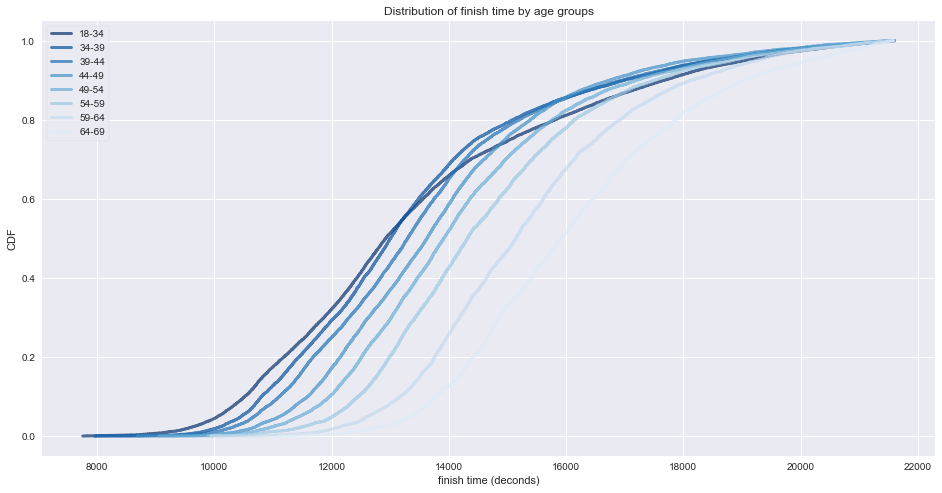

In [69]:
cdfs = [] 

for i in range(8):
    sub = df[df['age_group'] == age_group[i]]
    cdf = thinkstats2.Cdf(sub['finish_time_second'], label=age_labels[i])
    cdfs.append(cdf)
    
plt.figure(figsize=(16,8))
thinkplot.PrePlot(len(cdfs))
thinkplot.Cdfs(cdfs)
thinkplot.Config(title='Distribution of finish time by age groups', 
                 xlabel='finish time (deconds)', ylabel='CDF')

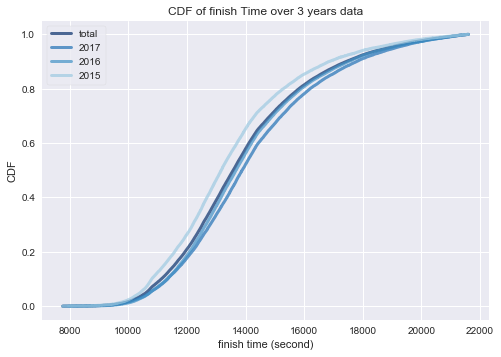

In [70]:
cdf_total = thinkstats2.Cdf(df['finish_time_second'], label='total')
cdf_2017 = thinkstats2.Cdf(df_2017['finish_time_second'], label='2017')
cdf_2016 = thinkstats2.Cdf(df_2016['finish_time_second'], label='2016')
cdf_2015 = thinkstats2.Cdf(df_2015['finish_time_second'], label='2015')

thinkplot.Cdf(cdf_total)
thinkplot.Cdf(cdf_2017)
thinkplot.Cdf(cdf_2016)
thinkplot.Cdf(cdf_2015)

thinkplot.Config(title='CDF of finish Time over 3 years data', 
                 xlabel='finish time (second)', ylabel='CDF')

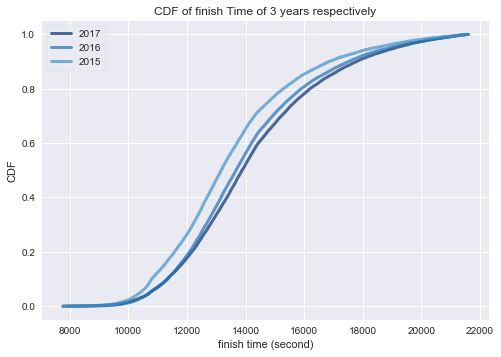

In [71]:
thinkplot.Cdf(cdf_2017)
thinkplot.Cdf(cdf_2016)
thinkplot.Cdf(cdf_2015)

thinkplot.Config(title='CDF of finish Time of 3 years respectively', 
                 xlabel='finish time (second)', ylabel='CDF')

### CCDF &  Survival analysis

This empirical CDF has the shape characteristic of a normal distribution.  
In order to determine if the normal distribution is a good model, let's plot the complementary CDF on a log(y) scale.

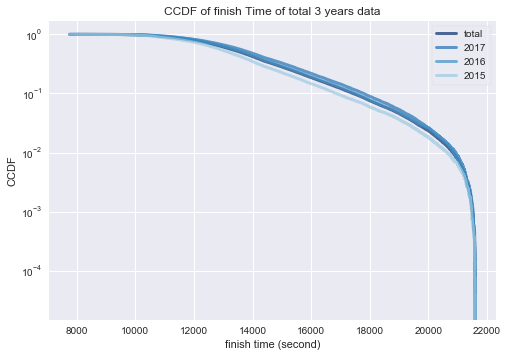

In [72]:
thinkplot.Cdf(cdf_total, complement=True)
thinkplot.Cdf(cdf_2017, complement=True)
thinkplot.Cdf(cdf_2016, complement=True)
thinkplot.Cdf(cdf_2015, complement=True)

thinkplot.Config(title='CCDF of finish Time of total 3 years data', 
                 xlabel='finish time (second)',
                 ylabel='CCDF', yscale='log')

Sometimes, it is useful to study the opposite question and ask how often the random variable is above a particular level. This is called the complementary cumulative distribution function (CCDF) or simply the tail distribution or exceedance, and is defined as  
F*(x) = P(X>x) = 1-F(x)  
In survival analysis, F* is called the survival function and denoted as S(x)

### Analytic Model  
As a CCDF of a gaussian distribution, the shape of this CCDF looks good. Hence, we can conclude that the normal distribution models out data fairly well. Let's plot the CDF of a theoretical exponential distribution alongside our data to see how similaer the CDFs look.  

In order to do this, we will have to set the parameter $\mu$ and $\sigma$, where $\mu$ is the mean or expectation of the distribution and $\sigma$ is the  standard deviation.

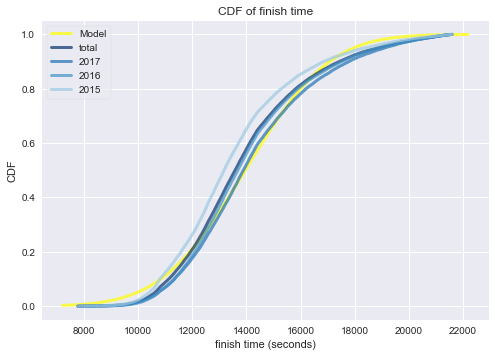

In [73]:
# Generate an normal distribution with mu and sigma of total finish time data

mu = df['finish_time_second'].mean()
sigma = df['finish_time_second'].std()

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, 7200, 22200, n=101)

label = 'Model' 
thinkplot.Plot(xs, ps, label=label, color='yellow')

thinkplot.Cdf(cdf_total)
thinkplot.Cdf(cdf_2017)
thinkplot.Cdf(cdf_2016)
thinkplot.Cdf(cdf_2015)
thinkplot.Config(title='CDF of finish time', 
                 xlabel='finish time (seconds)', ylabel='CDF')

almost fit perfectly!

### PDF & KDE

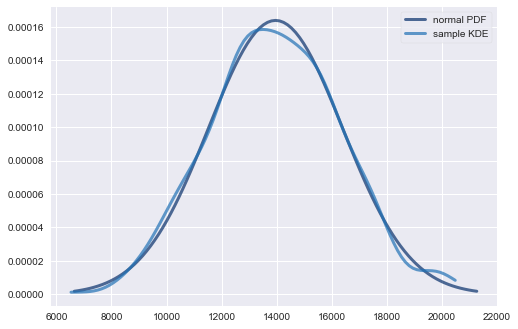

In [74]:
mean = mu
std = sigma
pdf = thinkstats2.NormalPdf(mean, std)

thinkplot.Pdf(pdf, label='normal PDF')

sample = [random.gauss(mean, std) for i in range(500)]
sample_pdf = thinkstats2.EstimatedPdf(sample)
thinkplot.Pdf(sample_pdf, label='sample KDE')

thinkplot.Show()

### Relations between virables

In [75]:
df.sort_values(by=['finish_time_second'], ascending=True, inplace=True, kind='mergesort', na_position='last')

In [76]:
df['rank'] = df['finish_time_second'].rank()

In [77]:
df['rank'].astype(int) 

52803        1
0            2
52804        3
1            4
52805        5
2            6
52806        7
52807        8
52808        9
52809       10
3           11
4           12
52810       13
5           14
26284       14
6           16
26285       17
52811       18
52812       19
52813       19
26286       21
26287       22
52814       23
7           24
8           25
9           26
10          27
26288       28
52815       29
26289       30
         ...  
52795    79288
79305    79288
79306    79288
79307    79288
79308    79288
79309    79291
26272    79293
52796    79293
79310    79293
26273    79295
26274    79296
26275    79296
52797    79298
52798    79299
79311    79299
26276    79302
26277    79302
52799    79302
79312    79302
52800    79305
26278    79306
52801    79307
26279    79308
26280    79310
52802    79310
79313    79310
26281    79312
26282    79313
26283    79314
79314    79314
Name: rank, Length: 79315, dtype: int64

### negative split strategy
The negative split strategy, in which the runner runs the 2nd part faster than the 1st part. A running strategy often recommended by some coaches and running enthusiasts

In [78]:
df['Half_2'] = df['Official Time'] - df['Half']
df['Half_2']= df['Half_2'].apply(lambda x: x.total_seconds())
df['Half']= df['Half'].apply(lambda x: x.total_seconds())
df['diff']=df['Half_2']-df['Half']
df['diff_abs'] = df['diff'].abs()

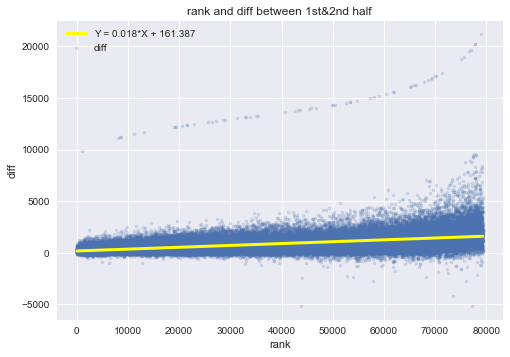

 Pearson:  0.471338295843
 Spearman:  0.547055150369
 inter:  161.386600288 
 slope:  0.0179993294932


In [79]:
rank = df['rank']
diff = df['diff']
inter, slope = thinkstats2.LeastSquares(rank, diff)
fit_xs, fit_ys = thinkstats2.FitLine(rank, inter, slope)

plt.scatter(df['rank'], df['diff'],alpha=0.2, s=10)
plt.plot(fit_xs, fit_ys, color='yellow', linewidth=3,
        label='Y = {}*X + {}'.format(round(slope, 3), round(inter, 3)))

plt.title('rank and diff between 1st&2nd half')
plt.xlabel('rank')
plt.ylabel('diff')
plt.legend(loc='upper left')

plt.show()

print(' Pearson: ', df[['rank', 'diff']].corr().loc['rank', 'diff'])
print(' Spearman: ', df[['rank', 'diff']].corr(method='spearman').loc['rank', 'diff'])
print(' inter: ', inter, '\n','slope: ', slope)

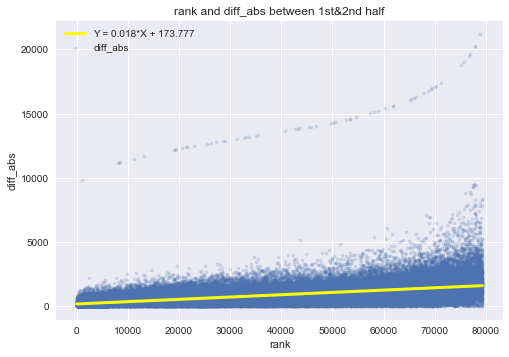

 Pearson:  0.479798831158
 Spearman:  0.557092680599
 inter:  173.776681412 
 slope:  0.0180313465142


In [80]:
rank = df['rank']
diff_abs = df['diff_abs']
inter, slope = thinkstats2.LeastSquares(rank, diff_abs)
fit_xs, fit_ys = thinkstats2.FitLine(rank, inter, slope)

plt.scatter(df['rank'], df['diff_abs'],alpha=0.2, s=10)
plt.plot(fit_xs, fit_ys, color='yellow', linewidth=3,
        label='Y = {}*X + {}'.format(round(slope, 3), round(inter, 3)))

plt.title('rank and diff_abs between 1st&2nd half')
plt.xlabel('rank')
plt.ylabel('diff_abs')
plt.legend(loc='upper left')

plt.show()

print(' Pearson: ', df[['rank', 'diff_abs']].corr().loc['rank', 'diff_abs'])
print(' Spearman: ', df[['rank', 'diff_abs']].corr(method='spearman').loc['rank', 'diff_abs'])
print(' inter: ', inter, '\n','slope: ', slope)

From here we can see that the slower a runer is, the bigger diff with half and half_2.

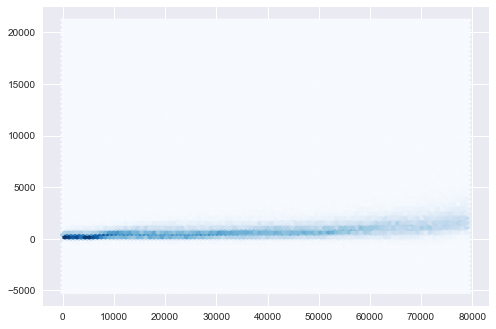

In [81]:
thinkplot.HexBin(df['rank'], df['diff'])

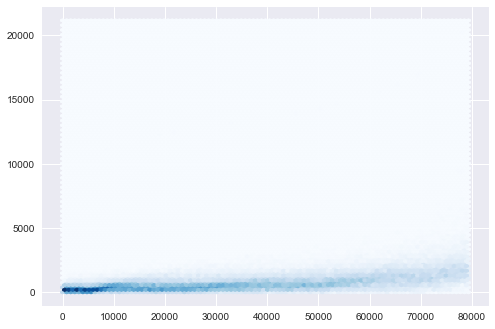

In [82]:
thinkplot.HexBin(df['rank'], df['diff_abs'])

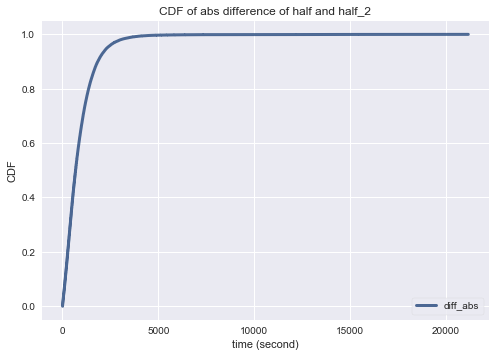

In [83]:
cdf_diff_abs = thinkstats2.Cdf(df['diff_abs'], label='diff_abs')
thinkplot.Cdf(cdf_diff_abs)
thinkplot.Config(title='CDF of abs difference of half and half_2', 
                 xlabel='time (second)', ylabel='CDF')

Pareto distribution !

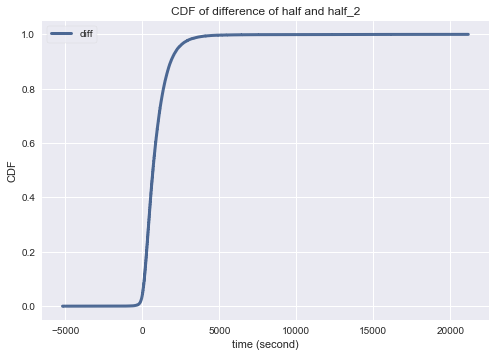

In [84]:
cdf_diff_abs = thinkstats2.Cdf(df['diff'], label='diff')
thinkplot.Cdf(cdf_diff_abs)
thinkplot.Config(title='CDF of difference of half and half_2', 
                 xlabel='time (second)', ylabel='CDF')

In [85]:
df['ratio_2:1'] = df['Half_2']/df['Half']

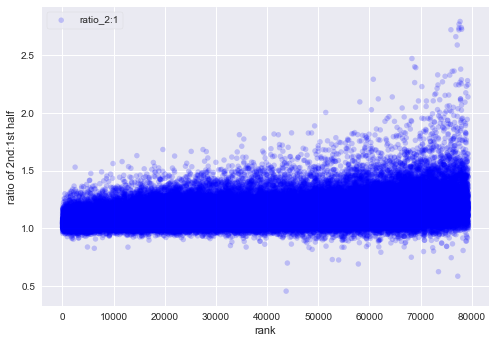

 Pearson:  0.378792732688
 Spearman:  0.409650181917
 inter:  173.776681412 
 slope:  0.0180313465142


In [86]:
thinkplot.Scatter(df['rank'], df['ratio_2:1'], alpha=0.2)
thinkplot.Show(xlabel='rank', ylabel='ratio of 2nd:1st half')

'''
rank = df['rank']
ratio = df['ratio_2:1']
inter, slope = thinkstats2.LeastSquares(rank, ratio)
fit_xs, fit_ys = thinkstats2.FitLine(rank, inter, slope)

plt.scatter(df['rank'], df['ratio_2:1'],alpha=0.2, s=10)
plt.plot(fit_xs, fit_ys, color='yellow', linewidth=3,
        label='Y = {}*X + {}'.format(round(slope, 3), round(inter, 3)))

plt.title('rank and ratio of 2nd:1st half')
plt.xlabel('rank')
plt.ylabel('ratio of 2nd:1st half')
plt.legend(loc='upper left')

plt.show()
'''
print(' Pearson: ', df[['rank', 'ratio_2:1']].corr().loc['rank', 'ratio_2:1'])
print(' Spearman: ', df[['rank', 'ratio_2:1']].corr(method='spearman').loc['rank', 'ratio_2:1'])
print(' inter: ', inter, '\n','slope: ', slope)

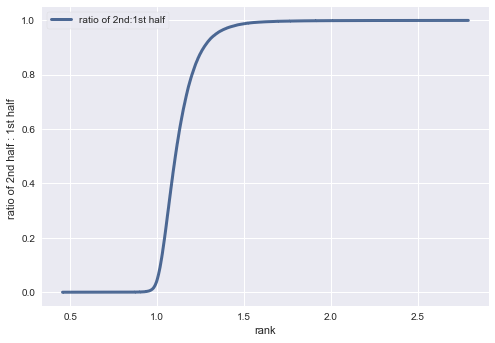

In [87]:
cdf_ratio = thinkstats2.Cdf(df['ratio_2:1'], label='ratio of 2nd:1st half')
thinkplot.Cdf(cdf_ratio)
thinkplot.Show(xlabel='rank', ylabel='ratio of 2nd half : 1st half ')

In [88]:
df_ratio = df[df['ratio_2:1'] < 1]

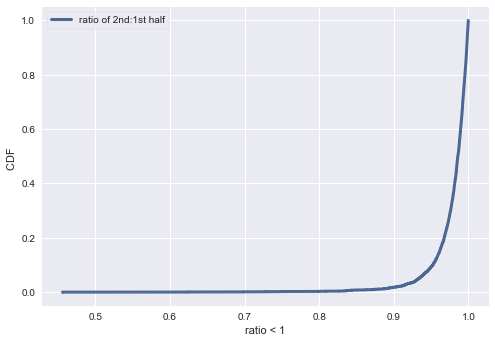

In [89]:
cdf_ratio = thinkstats2.Cdf(df_ratio['ratio_2:1'], label='ratio of 2nd:1st half')
thinkplot.Cdf(cdf_ratio)
thinkplot.Show(xlabel='ratio < 1', ylabel='CDF ')

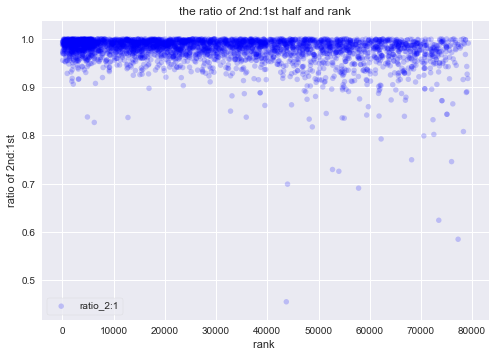

Pearson:  -0.246072029827
Spearman:  -0.199476270814


In [90]:
thinkplot.Scatter( df_ratio['rank'], df_ratio['ratio_2:1'], alpha=0.2)
thinkplot.Show(xlabel='rank ', ylabel='ratio of 2nd:1st',title='the ratio of 2nd:1st half and rank')

print('Pearson: ', df_ratio[['ratio_2:1', 'rank']].corr().loc['ratio_2:1', 'rank'])
print('Spearman: ', df_ratio[['ratio_2:1', 'rank']].corr(method='spearman').loc['ratio_2:1', 'rank'])

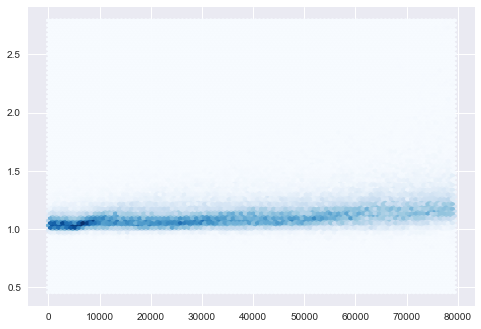

In [91]:
thinkplot.HexBin(df['rank'], df['ratio_2:1'])

### The Influence of Age On Finish Time  

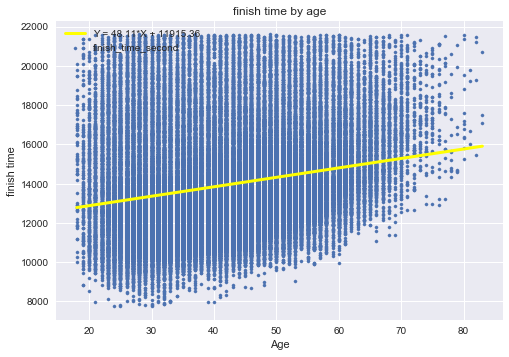

 Pearson:  0.22403613214
 Spearman:  0.256462052212
 inter:  11915.3601898 
 slope:  48.1104710682


In [92]:
age = df['Age']
finish_time = df['finish_time_second']
inter, slope = thinkstats2.LeastSquares(age, finish_time)
fit_xs, fit_ys = thinkstats2.FitLine(age, inter, slope)

plt.scatter(df['Age'], df['finish_time_second'], s=10)
plt.plot(fit_xs, fit_ys, color='yellow', linewidth=3,
        label='Y = {}*X + {}'.format(round(slope, 3), round(inter, 3)))

plt.title('finish time by age')
plt.xlabel('Age')
plt.ylabel('finish time')
plt.legend(loc='upper left')

plt.show()

print(' Pearson: ', df[['Age', 'finish_time_second']].corr().loc['Age', 'finish_time_second'])
print(' Spearman: ', df[['Age', 'finish_time_second']].corr(method='spearman').loc['Age', 'finish_time_second'])
print(' inter: ', inter, '\n','slope: ', slope)

In [93]:
df_M = df[df['M/F']=='M']
df_F = df[df['M/F']=='F']

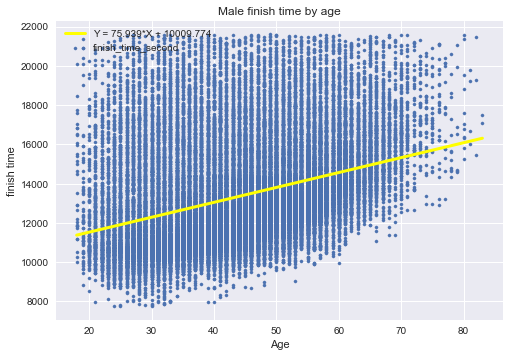

 Pearson:  0.353920477244
 Spearman:  0.419384193493
 inter:  10009.7743656 
 slope:  75.9392646532


In [94]:
age = df_M['Age']
finish_time = df_M['finish_time_second']
inter, slope = thinkstats2.LeastSquares(age, finish_time)
fit_xs, fit_ys = thinkstats2.FitLine(age, inter, slope)

plt.scatter(df_M['Age'], df_M['finish_time_second'], s=10)
plt.plot(fit_xs, fit_ys, color='yellow', linewidth=3,
        label='Y = {}*X + {}'.format(round(slope, 3), round(inter, 3)))

plt.title('Male finish time by age')
plt.xlabel('Age')
plt.ylabel('finish time')
plt.legend(loc='upper left')

plt.show()

print(' Pearson: ', df_M[['Age', 'finish_time_second']].corr().loc['Age', 'finish_time_second'])
print(' Spearman: ', df_M[['Age', 'finish_time_second']].corr(method='spearman').loc['Age', 'finish_time_second'])
print(' inter: ', inter, '\n','slope: ', slope)

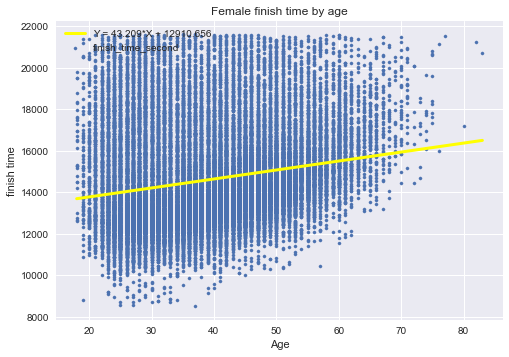

 Pearson:  0.205794939364
 Spearman:  0.264473477426
 inter:  12910.6560939 
 slope:  43.2090096938


In [95]:
age = df_F['Age']
finish_time = df_F['finish_time_second']
inter, slope = thinkstats2.LeastSquares(age, finish_time)
fit_xs, fit_ys = thinkstats2.FitLine(age, inter, slope)

plt.scatter(df_F['Age'], df_F['finish_time_second'], s=10)
plt.plot(fit_xs, fit_ys, color='yellow', linewidth=3,
        label='Y = {}*X + {}'.format(round(slope, 3), round(inter, 3)))

plt.title('Female finish time by age')
plt.xlabel('Age')
plt.ylabel('finish time')
plt.legend(loc='upper left')

plt.show()

print(' Pearson: ', df_F[['Age', 'finish_time_second']].corr().loc['Age', 'finish_time_second'])
print(' Spearman: ', df_F[['Age', 'finish_time_second']].corr(method='spearman').loc['Age', 'finish_time_second'])
print(' inter: ', inter, '\n','slope: ', slope)

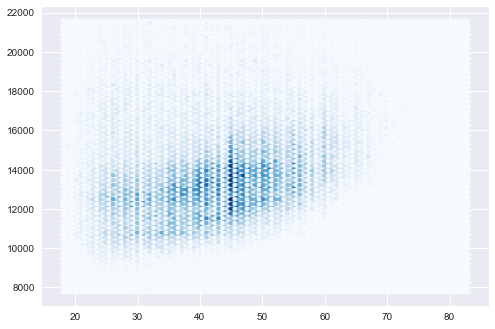

In [96]:
thinkplot.HexBin(df['Age'], df['finish_time_second'])

### speed stability

Cut Bins

In [97]:
df['0-5K']=df['5K'].apply(lambda x: x.total_seconds())

In [98]:
df['5-10K']=df['10K']-df['5K']
df['5-10K']=df['5-10K'].apply(lambda x: x.total_seconds())

In [99]:
df['10-15K']=df['15K']-df['10K']
df['10-15K']=df['10-15K'].apply(lambda x: x.total_seconds())

In [100]:
df['15-20K']=df['20K']-df['15K']
df['15-20K']=df['15-20K'].apply(lambda x: x.total_seconds())

In [101]:
df['20-25K']=df['25K']-df['20K']
df['20-25K']=df['20-25K'].apply(lambda x: x.total_seconds())

In [102]:
df['25-30K']=df['30K']-df['25K']
df['25-30K']=df['25-30K'].apply(lambda x: x.total_seconds())

In [103]:
df['30-35K']=df['35K']-df['30K']
df['30-35K']=df['30-35K'].apply(lambda x: x.total_seconds())

In [104]:
df['35-40K']=df['40K']-df['35K']
df['35-40K']=df['35-40K'].apply(lambda x: x.total_seconds())

In [105]:
df['40K+']=df['Official Time']-df['40K']
df['40K+']=df['40K+'].apply(lambda x: x.total_seconds())

In [106]:
df['stdev']=df[['0-5K','5-10K','10-15K','15-20K','20-25K','25-30K','30-35K','35-40K' ]].std(axis=1)

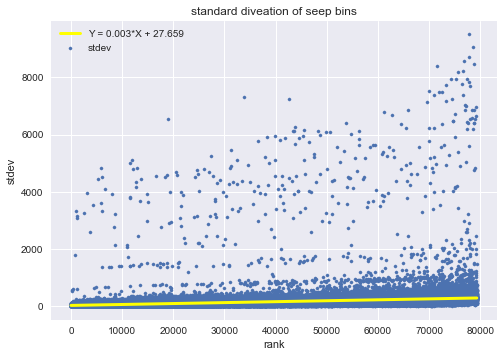

Pearson:  0.230239073751
Spearman:  0.619407545274
inter:  27.6589831237 
 slope:  0.00327152531481


In [107]:
rank = df['rank']
stdev = df['stdev']
inter, slope = thinkstats2.LeastSquares(rank, stdev)
fit_xs, fit_ys = thinkstats2.FitLine(rank, inter, slope)

plt.scatter(df['rank'], df['stdev'], s=10)
plt.plot(fit_xs, fit_ys, color='yellow', linewidth=3,
        label='Y = {}*X + {}'.format(round(slope, 3), round(inter, 3)))

plt.title('standard diveation of seep bins')
plt.ylabel('stdev')
plt.xlabel('rank')
plt.legend(loc='upper left')


plt.show()


print('Pearson: ', df[['rank','stdev']].corr().loc['rank','stdev'])
print('Spearman: ', df[['rank','stdev']].corr(method='spearman').loc['rank','stdev'])
print('inter: ', inter, '\n','slope: ', slope)

In [108]:
rank = df['rank']
stdev = df['stdev']
inter, slope = thinkstats2.LeastSquares(rank, stdev)
fit_xs, fit_ys = thinkstats2.FitLine(rank, inter, slope)

In [109]:
print('Pearson: ', df[['0-5K', 'rank']].corr().loc['0-5K', 'rank'])
print('Spearman: ', df[['0-5K', 'rank']].corr(method='spearman').loc['0-5K', 'rank'],'\n')
print('Pearson: ', df[['5-10K', 'rank']].corr().loc['5-10K', 'rank'])
print('Spearman: ', df[['5-10K', 'rank']].corr(method='spearman').loc['5-10K', 'rank'],'\n')
print('Pearson: ', df[['10-15K', 'rank']].corr().loc['10-15K', 'rank'])
print('Spearman: ', df[['10-15K', 'rank']].corr(method='spearman').loc['10-15K', 'rank'],'\n')
print('Pearson: ', df[['15-20K', 'rank']].corr().loc['15-20K', 'rank'])
print('Spearman: ', df[['15-20K', 'rank']].corr(method='spearman').loc['15-20K', 'rank'],'\n')
print('Pearson: ', df[['20-25K', 'rank']].corr().loc['20-25K', 'rank'])
print('Spearman: ', df[['20-25K', 'rank']].corr(method='spearman').loc['20-25K', 'rank'],'\n')
print('Pearson: ', df[['25-30K', 'rank']].corr().loc['25-30K', 'rank'])
print('Spearman: ', df[['25-30K', 'rank']].corr(method='spearman').loc['25-30K', 'rank'],'\n')
print('Pearson: ', df[['30-35K', 'rank']].corr().loc['30-35K', 'rank'])
print('Spearman: ', df[['30-35K', 'rank']].corr(method='spearman').loc['30-35K', 'rank'],'\n')
print('Pearson: ', df[['35-40K', 'rank']].corr().loc['35-40K', 'rank'])
print('Spearman: ', df[['35-40K', 'rank']].corr(method='spearman').loc['35-40K', 'rank'],'\n')
print('Pearson: ', df[['40K+', 'rank']].corr().loc['40K+', 'rank'])
print('Spearman: ', df[['40K+', 'rank']].corr(method='spearman').loc['40K+', 'rank'],'\n')

Pearson:  0.809517627408
Spearman:  0.882387940474 

Pearson:  0.774432951774
Spearman:  0.91641276848 

Pearson:  0.797386965384
Spearman:  0.939865330029 

Pearson:  0.749197418075
Spearman:  0.957623548731 

Pearson:  0.698984766729
Spearman:  0.969255265548 

Pearson:  0.663799895818
Spearman:  0.972923386662 

Pearson:  0.611880290713
Spearman:  0.954497247993 

Pearson:  0.509368824258
Spearman:  0.912864760528 

Pearson:  0.286405610663
Spearman:  0.872486405576 



### the first 10000 vs the rest

In [110]:
len(df)

79315

In [111]:
df_10000 = df[df['rank'] <= 10000]
df_rest = df[df['rank'] > 10000]

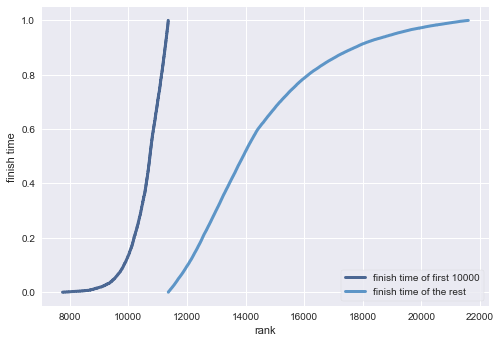

In [112]:
cdf_ratio_10000 = thinkstats2.Cdf(df_10000['finish_time_second'], label='finish time of first 10000')
cdf_ratio_rest = thinkstats2.Cdf(df_rest['finish_time_second'], label='finish time of the rest')
thinkplot.Cdf(cdf_ratio_10000)
thinkplot.Cdf(cdf_ratio_rest)
thinkplot.Show(xlabel='rank', ylabel='finish time')

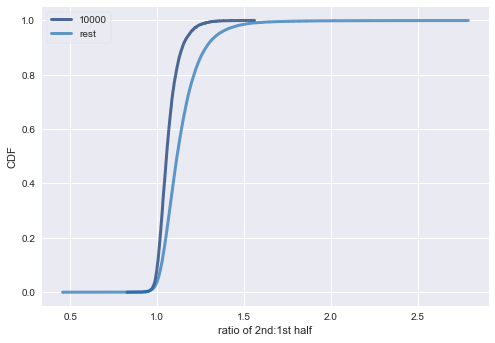

In [113]:
cdf_ratio_10000 = thinkstats2.Cdf(df_10000['ratio_2:1'], label='10000')
cdf_ratio_rest = thinkstats2.Cdf(df_rest['ratio_2:1'], label='rest')
thinkplot.Cdf(cdf_ratio_10000)
thinkplot.Cdf(cdf_ratio_rest)
thinkplot.Show(xlabel='ratio of 2nd:1st half', ylabel='CDF')

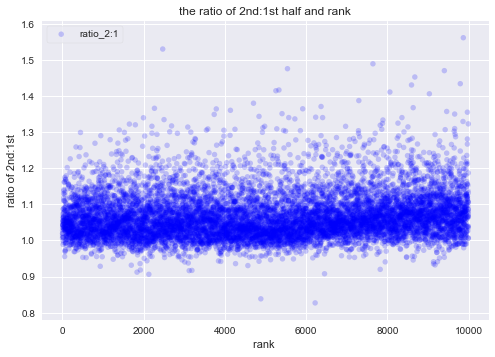

Pearson:             ratio_2:1      rank
ratio_2:1   1.000000  0.136445
rank        0.136445  1.000000 

Spearman:             ratio_2:1      rank
ratio_2:1   1.000000  0.149098
rank        0.149098  1.000000


In [114]:
thinkplot.Scatter( df_10000['rank'], df_10000['ratio_2:1'], alpha=0.2)
thinkplot.Show(xlabel='rank ', ylabel='ratio of 2nd:1st',title='the ratio of 2nd:1st half and rank')

print('Pearson: ', df_10000[['ratio_2:1', 'rank']].corr(), '\n')
print('Spearman: ', df_10000[['ratio_2:1', 'rank']].corr(method='spearman'))

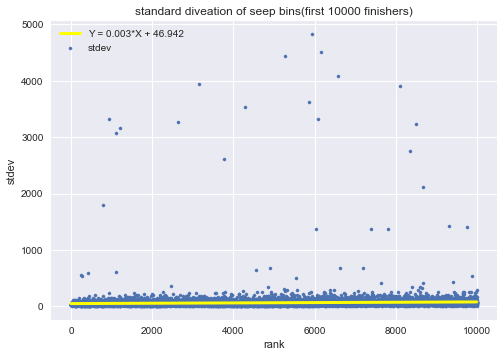

Pearson:  0.0539662299644
Spearman:  0.214777765545
inter:  46.9419026527 
 slope:  0.00291094023088


In [115]:
rank = df_10000['rank']
stdev = df_10000['stdev']
inter, slope = thinkstats2.LeastSquares(rank, stdev)
fit_xs, fit_ys = thinkstats2.FitLine(rank, inter, slope)

plt.scatter(df_10000['rank'], df_10000['stdev'], s=10)
plt.plot(fit_xs, fit_ys, color='yellow', linewidth=3,
        label='Y = {}*X + {}'.format(round(slope, 3), round(inter, 3)))

plt.title('standard diveation of seep bins(first 10000 finishers)')
plt.ylabel('stdev')
plt.xlabel('rank')
plt.legend(loc='upper left')


plt.show()


print('Pearson: ', df_10000[['rank','stdev']].corr().loc['rank','stdev'])
print('Spearman: ', df_10000[['rank','stdev']].corr(method='spearman').loc['rank','stdev'])
print('inter: ', inter, '\n','slope: ', slope)

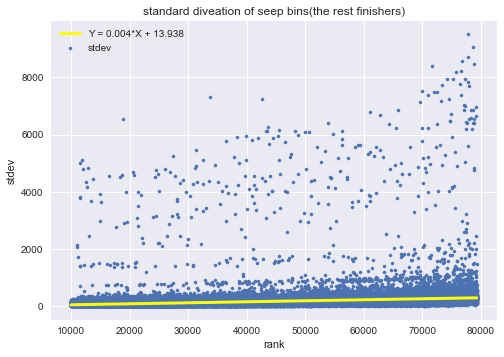

Pearson:  0.206854701613
Spearman:  0.554286324421
inter:  13.9378321145 
 slope:  0.00352232322538


In [116]:
rank = df_rest['rank']
stdev = df_rest['stdev']
inter, slope = thinkstats2.LeastSquares(rank, stdev)
fit_xs, fit_ys = thinkstats2.FitLine(rank, inter, slope)

plt.scatter(df_rest['rank'], df_rest['stdev'], s=10)
plt.plot(fit_xs, fit_ys, color='yellow', linewidth=3,
        label='Y = {}*X + {}'.format(round(slope, 3), round(inter, 3)))

plt.title('standard diveation of seep bins(the rest finishers)')
plt.ylabel('stdev')
plt.xlabel('rank')
plt.legend(loc='upper left')

plt.show()

print('Pearson: ', df_rest[['rank','stdev']].corr().loc['rank','stdev'])
print('Spearman: ', df_rest[['rank','stdev']].corr(method='spearman').loc['rank','stdev'])
print('inter: ', inter, '\n','slope: ', slope)

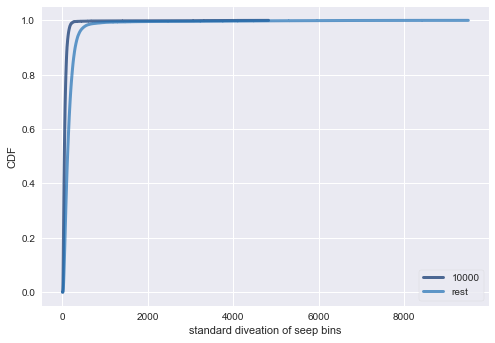

In [117]:
cdf_ratio_10000 = thinkstats2.Cdf(df_10000['stdev'], label='10000')
cdf_ratio_rest = thinkstats2.Cdf(df_rest['stdev'], label='rest')
thinkplot.Cdf(cdf_ratio_10000)
thinkplot.Cdf(cdf_ratio_rest)
thinkplot.Show(xlabel='standard diveation of seep bins', ylabel='CDF')

In [118]:
df_10000['stdev'].describe()

count    9998.000000
mean       61.495148
std       155.688056
min         0.000000
25%        25.680471
50%        43.048042
75%        70.915663
max      4823.567010
Name: stdev, dtype: float64

In [119]:
df_rest['stdev'].describe()

count    69317.000000
mean       171.234220
std        340.734470
min          0.000000
25%         67.514549
50%        118.250868
75%        197.232595
max       9498.218028
Name: stdev, dtype: float64

### Hypothesis testing

Athough the relation between them is not very strong, BUT it's statistic significant!

In [120]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

1.older and slower ?

In [121]:
data = df['Age'], df['rank'] 
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print(pvalue)

0.0


2.more stable and faster?

In [122]:
data = df['stdev'], df['rank'] 
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print(pvalue)

0.0
